In [80]:
'''
Classification - Pima Indians Diabetes
from https://www.kaggle.com/uciml/pima-indians-diabetes-database
Last Updated : 03/31/2019, by Hyungmin Jun (hyungminjun@outlook.com)

=============================================================================

Classification using Keras
Copyright 2019 Hyungmin Jun. All rights reserved.

License - GPL version 3
This program is free software: you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or any later version. This
program is distributed in the hope that it will be useful, but WITHOUT ANY
WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program. If not, see <http://www.gnu.org/licenses/>.
'''

'\nClassification - Pima Indians Diabetes\nfrom https://www.kaggle.com/uciml/pima-indians-diabetes-database\nLast Updated : 03/31/2019, by Hyungmin Jun (hyungminjun@outlook.com)\n\n=============================================================================\n\nClassification using Keras\nCopyright 2019 Hyungmin Jun. All rights reserved.\n\nLicense - GPL version 3\nThis program is free software: you can redistribute it and/or modify it under\nthe terms of the GNU General Public License as published by the Free Software\nFoundation, either version 3 of the License, or any later version. This\nprogram is distributed in the hope that it will be useful, but WITHOUT ANY\nWARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR\nA PARTICULAR PURPOSE. See the GNU General Public License for more details.\nYou should have received a copy of the GNU General Public License along with\nthis program. If not, see <http://www.gnu.org/licenses/>.\n'

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [82]:
df = pd.read_csv('../data/diabetes.csv', index_col=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
x = df.drop('Outcome', axis=1)
x

y = df['Outcome']
y

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape

c:\users\hyung\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(614, 8)

In [84]:
# Create train model
model = Sequential()
model.add(Dense(512, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,   kernel_initializer='uniform', activation='relu'))

model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
hist = model.fit(x_train, y_train, epochs=100, batch_size=400, verbose=2, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_98 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_99 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 129       
Total params: 168,961
Trainable params: 168,961
Non-trainable params: 0
_________________________________________________________________
Train on 491 samples, validate on 123 samples
Epoch 1/100
 - 1s - loss: 4.8621 - acc: 0.6375 - val_loss: 1.3191 - val_acc: 0.6748
Epoch 2/100
 - 0s - loss: 1.4487 - acc: 0.6375 - val_loss: 1.1151 - val_acc: 0.6748
Epoch 3/100
 - 0s - loss: 1.2146 - acc: 0.6375 - val_l

Text(0.5, 1.0, 'accuracy')

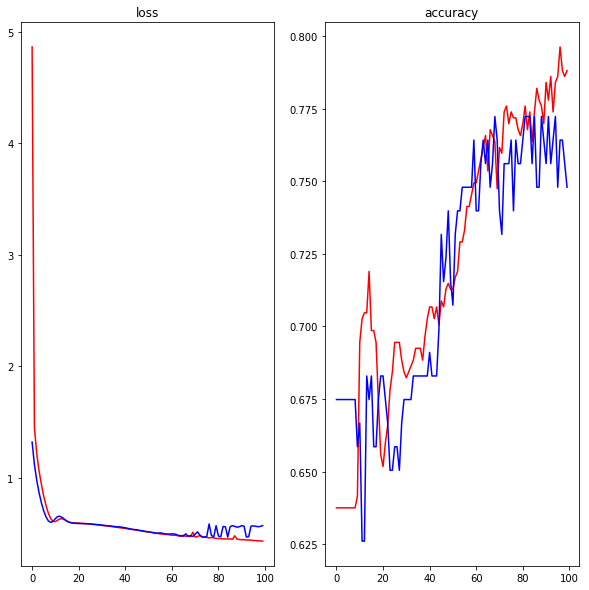

In [85]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('accuracy')

In [86]:
score = model.evaluate(x_test, y_test)
print(score)

pred = model.predict(x_test)
print(pred[:10])
print(y_test[:10])

154/154 [==============================] - 0s 78us/step
[0.6313386532393369, 0.7662337631374211]
[[0.46708867]
 [0.4597614 ]
 [0.        ]
 [0.3090894 ]
 [0.48521549]
 [0.9452016 ]
 [1.3183392 ]
 [0.5192121 ]
 [0.05871582]
 [0.99575543]]
613    0
582    0
134    0
475    0
608    0
236    1
159    1
518    0
208    0
378    1
Name: Outcome, dtype: int64
